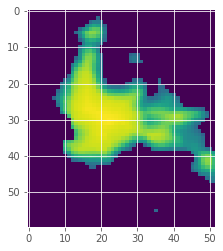

In [1]:
#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd

import positioning_sensors as ps
import regionGrowing as rg
importlib.reload(ps)
importlib.reload(rg)

import network_fitness as netfit
importlib.reload(netfit)

from geneticalgorithm import geneticalgorithm as ga

plt.style.use("ggplot")

##

from scipy import ndimage as ndi
from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.filters import rank

#import scipy.misc
#import numpy as np
from skimage.draw import line

##

#cargamos imagenes en luminance e importance
ilumina = 'example/inputs/qro_light_th'
niveles = 'example/inputs/prioridades'

#NLTI: luminance
luminance = ps.readIMG(ilumina)

#EAM: Environtmental attention map is the importance
EAM = ps.readIMG(niveles,invert=True)

nonsat,distance = ps.desaturate(luminance,th=62)

#smoothing parameters
sigma_y = 0.5
sigma_x = 0.5
sigma = [sigma_y,sigma_x]

nonsat2 = sp.ndimage.filters.gaussian_filter(nonsat, sigma, mode='constant')

#we filter only the values greater than 22
nonsat2 = (nonsat2>=22)*nonsat2

plt.imshow(nonsat2)
plt.show()

In [14]:
niveles

'example/inputs/prioridades'

In [19]:
from PIL import Image

Image.open(niveles)

im1 = Image.open('example/inputs/prioridades')

im1.save("prioridades_2.tif")

#fig.savefig('evm.tif', format='tif')

<ipython-input-21-c99c9f70baa2>:5: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(cax=cax)


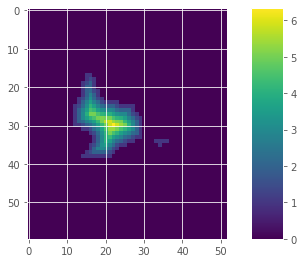

In [21]:
plt.imshow(distance)

plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
cax = plt.axes([0.75, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)
plt.show()

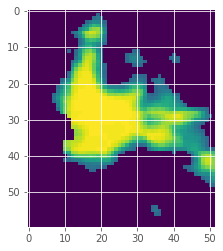

In [22]:
plt.imshow(luminance)

Funciones auxiliares

In [4]:
def perimeter(img):
    '''
    
    '''
    perimeter = list([])
    for i in range(0,img.shape[1]):
        perimeter.append((0,i))

    for i in range(0,img.shape[1]):
        perimeter.append((img.shape[1]-1,i))
    
    for i in range(0,img.shape[0]):
        perimeter.append((i,0))

    for i in range(0,img.shape[0]):
        perimeter.append((i,img.shape[1]-1))
        
    return perimeter



def constructMask(si,img):
    '''
    
    '''
    
    corner = perimeter(img)
    
    msk = np.zeros(img.shape)
    
    for x in corner:
        rr, cc = line(si[0], si[1], x[0], x[1])
        l = list([])
        
        
        for i in range(len(rr)):
            a = (rr[i],cc[i])
            l.append(sv1[a])
            
        #calculate the differences
        derivative = np.array(l[1:] - np.array(l[:-1]))
        
        #we detect the first derivative with the decresase of semivariogram
        
        if len(np.where((derivative <= 0)*1==1)[0])>0:
            
            ix = np.where((derivative <= 0)*1==1)[0][0]+0
        else:
            
            #the last index possible in derivative vector
            ix = len(derivative)-1
        
        
        
        
        #we mark this with one
        msk[rr[:ix+1],cc[:ix+1]] = 1
    
    return msk
        

Testing Gaussian Smoothing

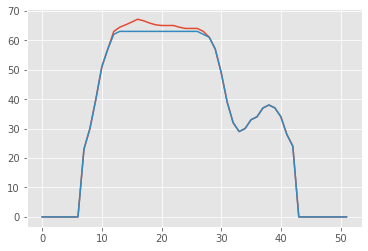

In [24]:
testline = 25
plt.plot(nonsat[testline][:])
plt.plot(luminance[testline][:])
plt.show()

**Testing semivariance map production**

test that z (34, 28) = 0.0


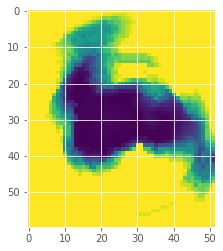

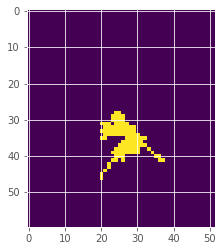

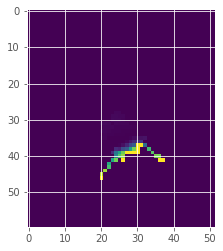

In [51]:

#tolerance angle +-15 Degrees
atol = 15

#tolerance distance +-0.5 euclidean units
dtol = 0.5

#fill the required params
params = {"type": "semivar", 
          "si": si, 
          "atol": atol, 
          "dtol": dtol}



sv = np.zeros(luminance.shape)

#tell to the class, which object is going to be used to make the semivariogram
rG = rg.rGrowing(nonsat2)

rG.setParams(params)

si = (34,28)
sv1 = rG.makeSemivarianceMap(si)
print("test that z",si,"=", sv1[(si)])
plt.imshow(sv1)
plt.show()

m = ps.constructMask(si,sv1)
plt.imshow(m)
plt.show()

plt.imshow(m*sv1)
plt.show()

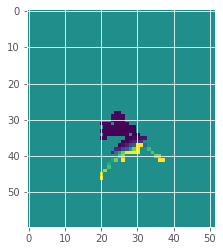

In [29]:
A = ((out==0)*np.max(sv1)/2)+sv1*out
plt.imshow(A)

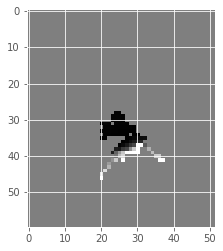

In [30]:
plt.imshow(A,cmap='gray')
plt.show()

In [31]:
si

(34, 28)

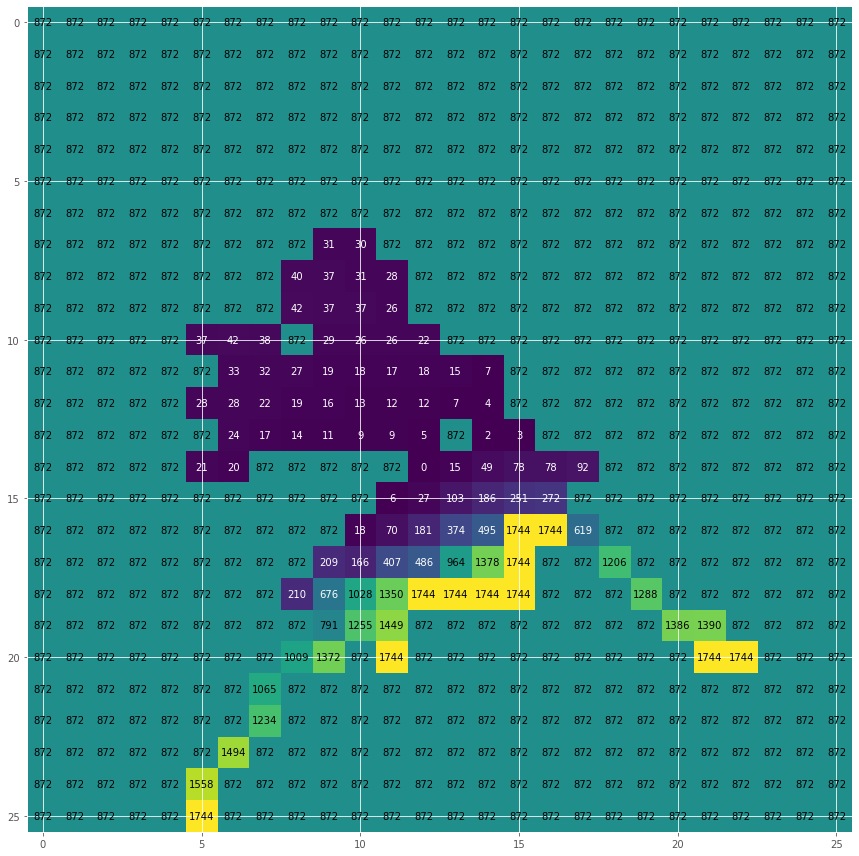

In [32]:
c = 13
recorte = A[si[0]-c:si[0]+c,si[1]-c:si[1]+c]

img = recorte


fig, ax = plt.subplots(figsize=(12,12))
im = ax.imshow(img)
for i in range((img.shape[0])):
    for j in range(img.shape[1]):
        if int(img[i, j])!=1019:
            if int(img[i, j])<710:
                if (i== int(img.shape[0]/2) and j==int(img.shape[1]/2)):
                    text = ax.text(j, i, "X", ha="center", va="center", color="white")
                else:
                    text = ax.text(j, i, int(img[i, j]), ha="center", va="center", color="white")
            else:
                text = ax.text(j, i, int(img[i, j]), ha="center", va="center", color="black")

            

#fig.title(np.sum(img))
fig.tight_layout()
plt.show()
fig.savefig('semivariogram.eps', format='eps', dpi=100)


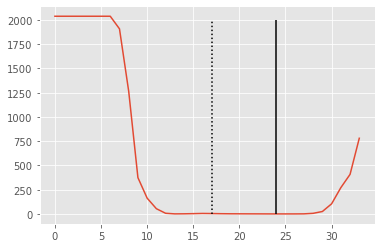

In [82]:
plt.plot(sv1[si[0],:si[1]+10])
plt.vlines(si[1]-7, 0, 2000, linestyles ="dotted", colors ="k") 
plt.vlines(si[1], 0, 2000, linestyles ="solid", colors ="k") 
plt.show()

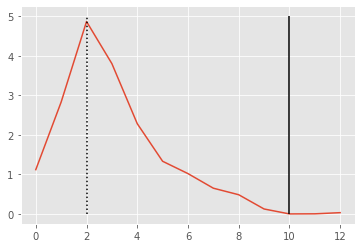

In [126]:
plt.plot(sv1[si[0],si[1]-10:si[1]+3])

plt.vlines(2, 0, 5, linestyles ="dotted", colors ="k") 
plt.vlines(si[1]-14, 0, 5, linestyles ="solid", colors ="k") 
plt.show()

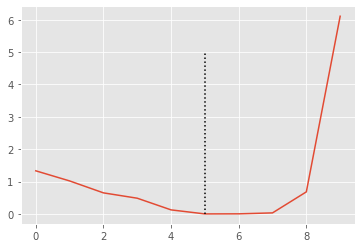

In [124]:
plt.plot(sv1[si[0],si[1]-5:si[1]+5])
plt.vlines(5, 0, 5, linestyles ="dotted", colors ="k") 
plt.xticks([15,16,17,18,19,20,21,22])

In [ ]:
#https://es.acervolima.com/matplotlib-pyplot-vlines-en-python/

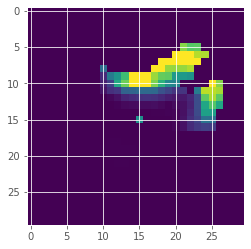

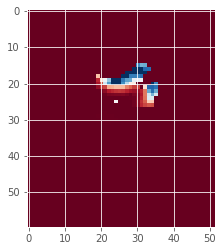

In [35]:

sv1[si]=np.max(sv1)/2
A = m*sv1
plt.imshow(A[si[0]-15:si[0]+15,si[1]-15:si[1]+15])
plt.show()
plt.imshow(A,cmap='RdBu')

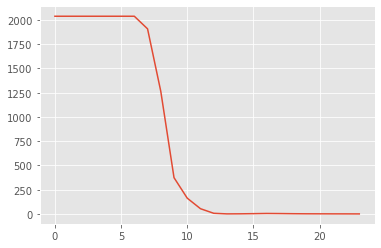

In [55]:
plt.plot(sv1[si[0],:si[1]])

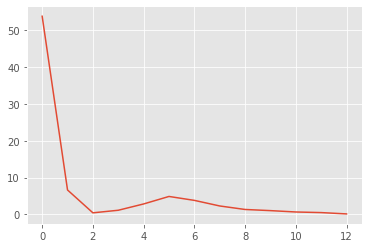

In [58]:
plt.plot(sv1[si[0],11:si[1]])

In [17]:
#referencias
#https://es.calcuworld.com/calculadoras-matematicas/trigonometria/arcotangente/
#https://www.engineeringtoolbox.com/slope-degrees-gradient-grade-d_1562.html

#simple growing region algoritm
#https://developpaper.com/simple-implementation-of-region-growing-in-python/

**Generate variograms**

1. obtener coordenadas validas (todas aquellas donde hay luminocidad por arriba de 22
2. por cada coordenada valida, generar un semivariograma espacial


3. por cada semivariograma crear la mascara de influencia m

x,y,flatten semivariogram, flatten influence mask



## Example with three coordinates

0.0 (40, 51)


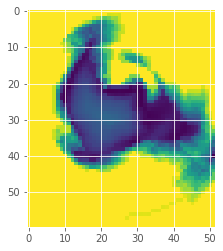

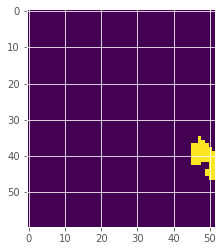

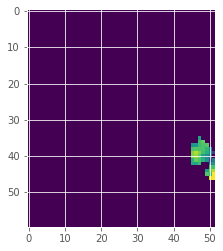

In [18]:
#get valid coordinates

coords = ps.get_coords(nonsat2>0)[[50,100,500]]
rG = rg.rGrowing(nonsat2)
rG.setParams(params)
si = tuple(coords[0])
si = tuple([40,51])
sv = rG.makeSemivarianceMap(si)
svm = constructMask(si,sv)


print(sv[si],si)
plt.imshow(sv)
plt.show()
plt.imshow(svm)
plt.show()
plt.imshow(svm*sv)
plt.show()

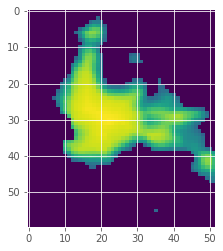

In [19]:
plt.imshow(nonsat2)

In [80]:
coords = ps.get_coords(nonsat2>0)
coords

array([[ 2, 19],
       [ 3, 17],
       [ 3, 18],
       ...,
       [47, 50],
       [47, 51],
       [55, 35]])

In [81]:
from IPython.display import clear_output

n = len(coords)

#ncords x imagesize m x n
image_size = (n,nonsat2.shape[0]*nonsat2.shape[1])
allsemivariances = np.zeros(image_size)
allmask = np.zeros(image_size)

df = pd.DataFrame()

for i,si in enumerate(coords):
    
    clear_output(wait=True)
    s="{percen: 1.2f}%"
    print(s.format(percen = 100*(i+1)/(n)))
    si = tuple(si)
    
    #generate a semivariance sv map
    sv = rG.makeSemivarianceMap(si)
    
    #flattne sv to store it in a dataframe
    allsemivariances[i] = sv.flatten()
    
    #construct a mask of sv and then flatten it
    allmask[i] = constructMask(si,sv).flatten()
    
 

 100.00%


In [89]:
si = (24,27)





**Write results**

In [84]:
filesv = "semivariance_15_05_D.csv"
filesvmask = "semivariance_15_05_mask_D.csv"

df_semivariance = pd.DataFrame(allsemivariances)
df_semivariance.insert(0,"coordsy",coords[:,0]) 
df_semivariance.insert(1,"coordsx",coords[:,1])
df_semivariance.to_csv(filesv)

df_semivariance_mask = pd.DataFrame(allmask)
df_semivariance_mask.insert(0,"coordsy",coords[:,0]) 
df_semivariance_mask.insert(1,"coordsx",coords[:,1])
df_semivariance_mask.to_csv(filesvmask)

**Read**

 W = i*a^(p)
Selct cost functions: 
 'xor','max' or 'cover'
[273]


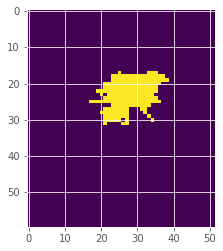

In [90]:


data = pd.read_csv(filesv)
coords = np.array(data.iloc[:,1:3])

data_m = pd.read_csv(filesvmask)
variogram_set = np.array(data.iloc[:,3:])
variograms = variogram_set.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])
variograms_m = variogram_set_m.reshape(len(variogram_set),nonsat.shape[0],nonsat.shape[1])
variogram_set_m = np.array(data_m.iloc[:,3:])


NLTI = nonsat2

sensitivity = ps.f5(NLTI,EAM,64)
aptitude = netfit.NetworkFitness(NLTI,EAM,sensitivity,variograms,variograms_m,coords)



ix = aptitude.validate_coordinates(si[0],si[1])
print(ix)


plt.imshow(aptitude.coverage2(np.array([24,27]))[0])
cover = aptitude.local_variograms_m[ix][0]
plt.imshow(cover)



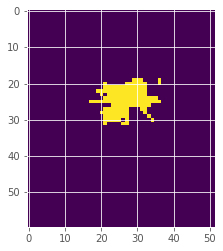

In [120]:
tvar = aptitude.local_variograms[ix][0]
                
tvar_m = aptitude.local_variograms_m[ix][0]
                
#outofrange = (tvar==0)*(pi**2/2)
outofrange = (tvar_m==0)*(np.max(NLTI)**2/2)
inrange = (tvar_m==1)*tvar

                
#M = tvar+outofrange
M = inrange+outofrange
                
lb = (np.max(NLTI))**2/2
map0to1 = (lb-M)/(lb)

plt.imshow(map0to1*sensitivity>0)

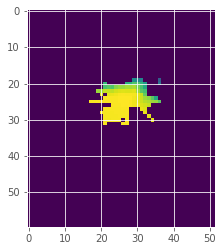

In [121]:
plt.imshow(map0to1*(nonsat2>0))

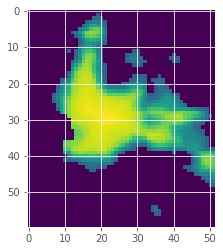

In [119]:
plt.imshow(nonsat)




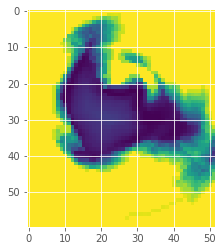

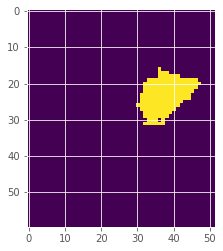

In [22]:
ix = 501
plt.imshow(allsemivariances[ix].reshape(nonsat2.shape))
plt.show()

am = allmask[ix].reshape(nonsat2.shape)
am[tuple(coords[ix])]=0
plt.imshow(am)
plt.show()

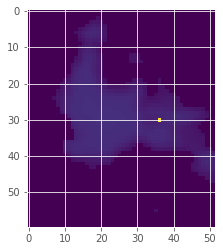

In [23]:
tuple(coords[ix])
nonsat2_copy = np.zeros(nonsat2.shape)
nonsat2_copy = nonsat2
nonsat2_copy[tuple(coords[ix])]=500
plt.imshow(nonsat2_copy)

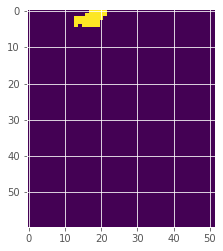

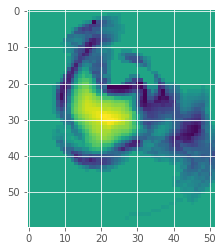

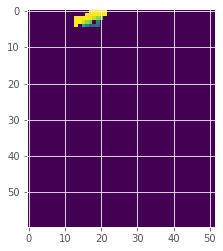

In [24]:
ix = 2
M = allmask[ix].reshape(nonsat2.shape)
plt.imshow(M)
plt.show()
V = allsemivariances[ix].reshape(nonsat2.shape)
plt.imshow(V)
plt.show()
A = allsemivariances[ix].reshape(nonsat2.shape)*allmask[ix].reshape(nonsat2.shape)
plt.imshow(A)
plt.show()

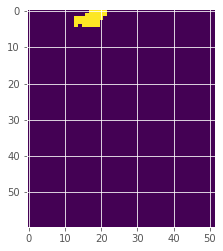

In [31]:
M[(59,51)] = 0
plt.imshow(M)

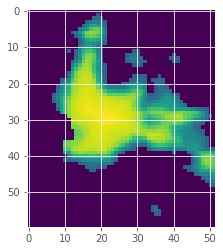

In [26]:
#nonsat[(16,17)]=0
nonsatv = np.zeros(nonsat.shape)
nonsatv = nonsat
nonsatv[(30,51)]= 0 
plt.imshow(nonsatv)

In [27]:
T = np.flip(V[16][:18])

T[1:]-T[:-1]

array([ 1.22240448e+02,  9.92734487e+00, -1.00867154e+02, -1.84384331e+02,
       -5.64462826e+01,  1.49204507e+02,  2.17050360e+02,  0.00000000e+00,
        0.00000000e+00,  5.68434189e-14,  0.00000000e+00, -5.68434189e-14,
        5.68434189e-14,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -5.68434189e-14])

In [28]:
allmask[ix].reshape(nonsat2.shape)[16][:18]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

# Testing semivariance map and semivariance mask

In [221]:
svr = pd.read_csv(filesv)
svrm = pd.read_csv(filesvmask)

coordinates 
 coordsy    25.0
coordsx    25.0
Name: 293, dtype: float64


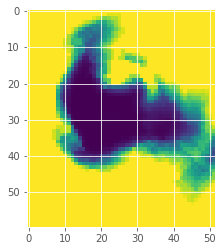

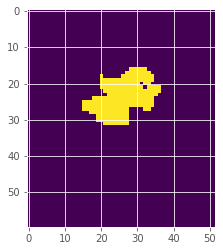

In [228]:
ix = 293
print("coordinates \n", svr.iloc[ix][1:3])
plt.imshow(np.array(svr.iloc[ix][3:]).reshape(nonsat2.shape))
plt.show()

plt.imshow(np.array(svrm.iloc[ix][3:]).reshape(nonsat2.shape))
plt.show()


In [173]:
S = pd.read_csv(filesv)
M = pd.read_csv(filesvmask)

print(tuple(M.iloc[0][1:3]))

(2.0, 19.0)


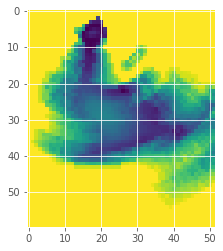

In [205]:
ix = 201
IMG  = (np.array(S.iloc[ix][3:])).reshape(nonsat.shape[0],nonsat.shape[1])
IMGM = (np.array(M.iloc[ix][3:])).reshape(nonsat.shape[0],nonsat.shape[1])
plt.imshow(IMG)

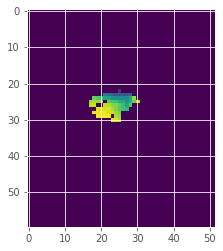

In [207]:
plt.imshow(IMG*IMGM)

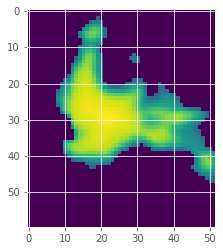

In [208]:
plt.imshow(nonsat2)

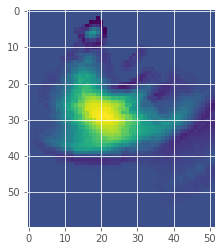

In [113]:
V = np.array(S.iloc[0][3:]).reshape(nonsat2.shape[0],nonsat2.shape[1])
plt.imshow(V)

0.0

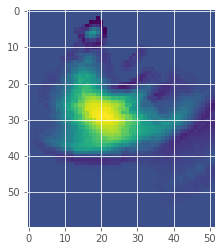

In [45]:
plt.imshow(allsemivariances[0].reshape(nonsat2.shape[0],nonsat2.shape[1]))

In [31]:
tuple(coords[0])

(2, 19)

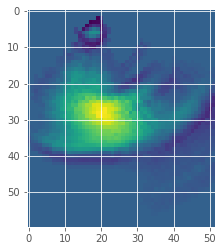

In [104]:

si = ()
plt.imshow(rG.makeSemivarianceMap(tuple(coords[1]) ))

In [70]:
allsemivariances.shape

(5, 3120)

In [140]:
a = np.array([3,4,5,5])

if len(np.where(a==50)[0])>0:
    ix = np.where(a==50)[0][0]
else:
    ix =  
    


In [83]:
df_allsvar = pd.DataFrame(allsemivariances)
df_allmask = pd.DataFrame(allmask)

#df.insert(0,"coordsy",coords[:5,0]) 
#df.insert(1,"coordsx",coords[:5,1])

#df.insert(2,"semiv", allsemivariances)
#df["mask"] = allmask

#M = np.array(df["semiv"][0][0]).reshape(nonsat.shape[0],nonsat.shape[1])

df

,coordsy,coordsx,0,1,2,3,4,5,6,7,...,3110,3111,3112,3113,3114,3115,3116,3117,3118,3119
0,2,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
allsemivariances.shape

(5, 3120)

In [28]:
allsemivariances.shape

(889, 3120)

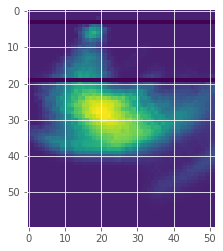

In [88]:
dplt.imshow(sv)

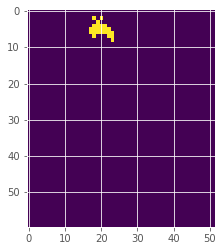

In [40]:
plt.imshow(allmask[i].reshape(nonsat2.shape[0],nonsat2.shape[1]))


In [38]:
nonsat2[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [ ]:
import pylab
import matplotlib.pyplot as plot

# List of points in x axis
XPoints     = []

# List of points in y axis
YPoints     = []

# X and Y points are from -6 to +6 varying in steps of 2 
for val in range(0, sv1.shape[0], 1):
    YPoints.append(val)
    
for val in range(0, sv1.shape[1], 1):
    XPoints.append(val)

# Z values as a matrix
ZPoints     = np.ndarray(sv1.shape)

# Populate Z Values (a 7x7 matrix) - For a circle x^2+y^2=z    
for x in range(0, len(XPoints)):
    for y in range(0, len(YPoints)):
        ZPoints[y][x] = sv1[y,x]

# Print x,y and z values
print(XPoints)
print(YPoints)
print(ZPoints)

# Set the x axis and y axis limits
pylab.xlim([0,sv1.shape[1]])
pylab.ylim([0,sv1.shape[0]])

# Provide a title for the contour plot
plot.title('Contour plot')

# Set x axis label for the contour plot
plot.xlabel('X')

# Set y axis label for the contour plot
plot.ylabel('Y')

# Create contour lines or level curves using matplotlib.pyplot module
contours = plot.contour(XPoints, YPoints, ZPoints,levels=[7])